<a href="https://colab.research.google.com/github/whoiskiki/texts_readability_analysis/blob/main/Potential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sympy import symbols
import numpy as np
from itertools import combinations

alpha = symbols('alpha')
beta = symbols('beta')

In [ ]:
table = pd.read_csv('hokku_limericksRES.csv', sep=',', lineterminator='\n',
                    header=None)
table.dropna(inplace=True)
lines = len(table)

tbl = table.iloc[1:]
n = len(tbl)

from sympy import bell
print(bell(11))

from more_itertools import set_partitions
players = list(range(11))
structures = list(set_partitions(players))

678570


In [ ]:
vectors = table.to_numpy()

# Вычисляем сумму всех попарных манхэттенских расстояний
total_distances = sum(
    np.sum(np.abs(v1 - v2))
    for v1, v2 in combinations(vectors, 2)
)

total_distances.item()

96.02767431968662

In [ ]:
import math

# Функция подсчета мощности каждой коалиции внутри коалиционного разбиения

def calculate_capacity(partition):
  cap = 0
  for coalition in partition:
    cap += math.pow(len(coalition), 2)
  return cap

In [ ]:
# Функция для вычисления суммы попарных манхэттенских расстояний внутри коалиции
def coalition_distance(coalition, vectors):
    return sum(
        np.sum(np.abs(vectors[i] - vectors[j]))
        for i, j in combinations(coalition, 2)
    )

In [ ]:
with open('output.txt', 'w') as f:
  for partition in structures:
    capacity = calculate_capacity(partition)
    partition_sum = sum(coalition_distance(coalition, vectors) for coalition in partition)
    #print(alpha/4*(capacity - len(vectors)))
    potential = (len(vectors)-1)*beta*total_distances + alpha/4*(capacity - len(vectors))-(1+2*beta)/2*partition_sum
    f.write(f"Partition: {partition}, Potential: {potential}\n")

print("Данные записаны в файл.")

Данные записаны в файл.


In [23]:
alpha = 2
beta = 1

max_value = float('-inf')
best_partition = None

with open('output.txt', 'r') as f:
  i = 0
  for line in f:
    i+=1
    partition_str, potential_str = line.strip().split('Potential:')
    partition = eval(partition_str.split('Partition:')[1].strip())
    potential_expr = potential_str.strip()

    expr = potential_expr.replace('alpha', f'({alpha})').replace('beta', f'({beta})')

    try:
        value = eval(expr)  # безопасно, потому что мы подставляем значения
    except Exception as e:
        print(f"Ошибка при разборе строки: {line}")
        continue

    if value > max_value:
        max_value = value
        best_partition = partition
  print(i)

print("Максимальное значение:", max_value)
print("Лучшее разбиение:", best_partition)

678570
Максимальное значение: 960.276743196866
Лучшее разбиение: ([[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10]],)


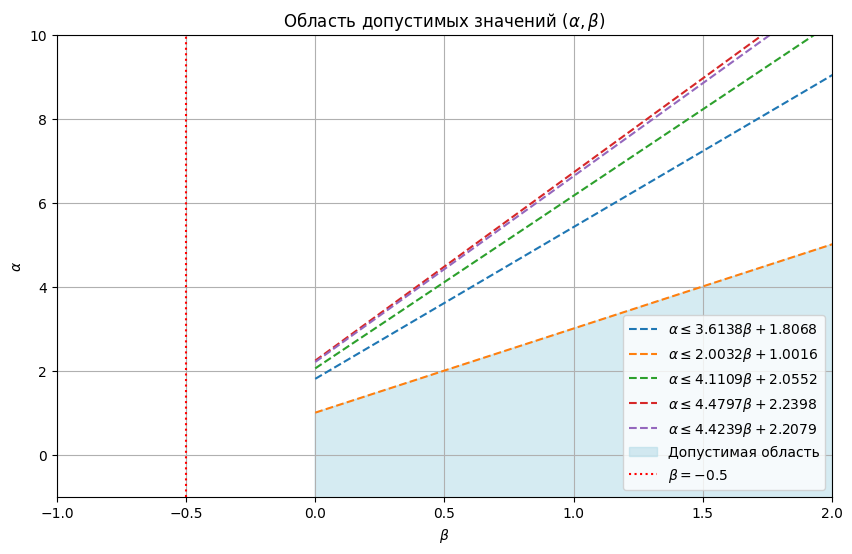

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Создаем диапазон значений beta
beta = np.linspace(0, 50, 500)

# Выражения из неравенств с alpha
alpha1 = 3.6138 * beta + 1.8068
alpha2 = 2.0032 * beta + 1.0016
alpha3 = 4.1109 * beta + 2.0552
alpha4 = 4.4797 * beta + 2.2398
alpha5 = 4.4239 * beta + 2.2079

# Минимум по alpha
alpha_min = np.minimum.reduce([alpha1, alpha2, alpha3, alpha4, alpha5])

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(beta, alpha1, label=r'$\alpha \leq 3.6138\beta + 1.8068$', linestyle='--')
plt.plot(beta, alpha2, label=r'$\alpha \leq 2.0032\beta + 1.0016$', linestyle='--')
plt.plot(beta, alpha3, label=r'$\alpha \leq 4.1109\beta + 2.0552$', linestyle='--')
plt.plot(beta, alpha4, label=r'$\alpha \leq 4.4797\beta + 2.2398$', linestyle='--')
plt.plot(beta, alpha5, label=r'$\alpha \leq 4.4239\beta + 2.2079$', linestyle='--')

# Закрашенная допустимая область
plt.fill_between(beta, -10, alpha_min, where=(beta >= -0.5), color='lightblue', alpha=0.5, label='Допустимая область')

# Линия ограничения по beta
plt.axvline(x=-0.5, color='red', linestyle=':', label=r'$\beta = -0.5$')

# Настройки графика
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\alpha$')
plt.title(r'Область допустимых значений $(\alpha, \beta)$')
plt.legend()
plt.grid(True)
plt.ylim(-1, 10)
plt.xlim(-1, 2)

plt.show()
